# Analyse de graphe avec NetworkX (format .net)

TP réalisé par :

**WELEHELA TAWEUTEU ORCHELLE PATRICIA**

In [1]:
import matplotlib.pyplot as plt
import kagglehub
import os
import networkx as nx

## **Étape 1 – Télécharger le dataset avec kagglehub**

In [2]:
# Télécharger le dataset
path = kagglehub.dataset_download("mateuscco/toy-network-datasets")

print("Chemin local du dataset :", path)

100%|██████████| 68.7k/68.7k [00:00<00:00, 27.8MB/s]

Extracting files...
Chemin local du dataset : /root/.cache/kagglehub/datasets/mateuscco/toy-network-datasets/versions/1


## **Étape 2 – Lister les fichiers .net disponibles**

In [3]:
# Lister les fichiers .net dans le dossier
net_files = [f for f in os.listdir(path) if f.endswith('.net')]

print("Fichiers Pajek (.net) disponibles :")
for i, file in enumerate(net_files):
    print(f"{i+1}. {file}")

Fichiers Pajek (.net) disponibles :
1. 26KeroNetwork.net
2. imports_manufactures.net
3. YeastS.net
4. NetScience.net
5. Ring25.net


## Étape 3 – Charger un graphe .net avec NetworkX

Le format .net est utilisé par le logiciel Pajek pour représenter des graphes. NetworkX permet de le lire facilement.

In [4]:
#import networkx as nx

# Choisir un fichier Pajek
graph_file = os.path.join(path, net_files[0])  # ou net_files[n] pour un autre

# Charger le graphe
G = nx.read_pajek(graph_file)

# Convertir en graphe non orienté si nécessaire
G = nx.Graph(G)

**nx.read_pajek(...)** lit le fichier au format Pajek.

Certains graphes sont orientés (DiGraph) : on peut les convertir en non orientés avec nx.Graph(G) si besoin.

## **Étape 4 – Afficher le nombre de nœuds et d’arêtes**

In [5]:
print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d’arêtes : {G.number_of_edges()}")

Nombre de nœuds : 135
Nombre d’arêtes : 318


## **Étape 5 – Visualiser le graphe avec Matplotlib**

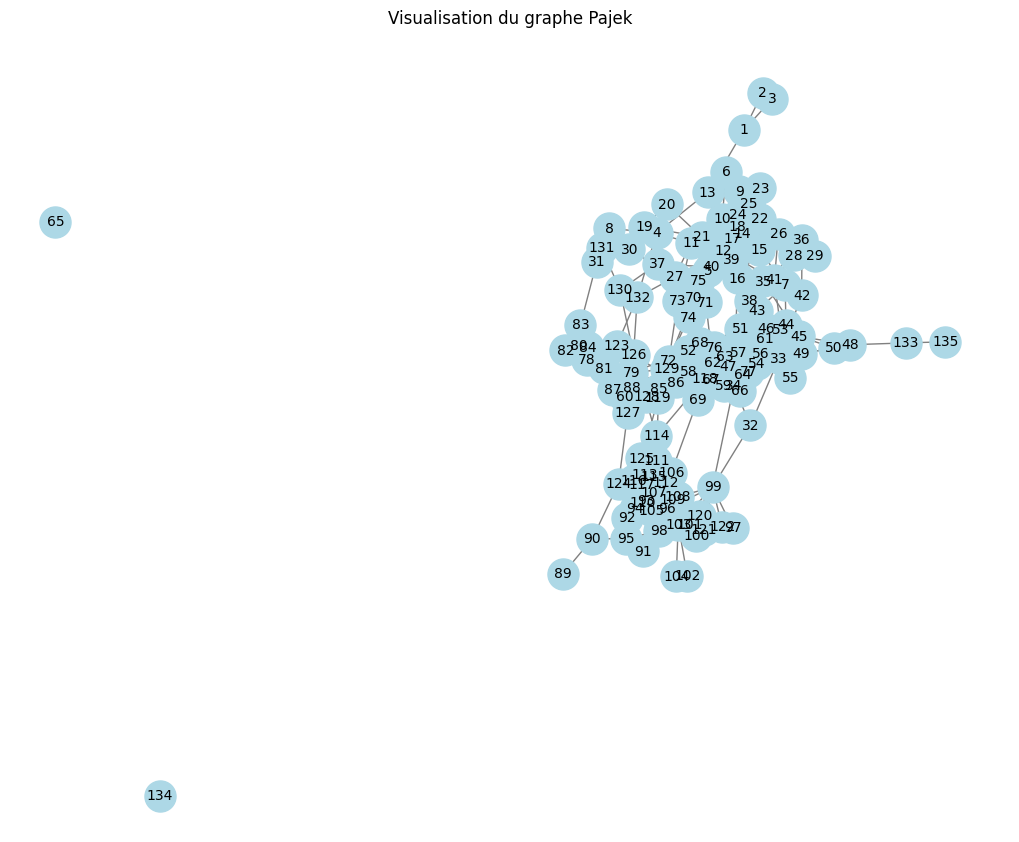

In [6]:
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Visualisation du graphe Pajek")
plt.show()

**nx.draw(...)** : dessine le graphe avec options de style.

with_labels=True : affiche les noms des nœuds.

## **Étape 6 – Calculer le degré de chaque nœud**

In [7]:
# Calcul du degré
degrees = dict(G.degree())

# Affichage
print("Degré de chaque nœud :")
for node, deg in degrees.items():
    print(f"{node} : {deg}")


Degré de chaque nœud :
1 : 3
2 : 2
3 : 2
4 : 4
5 : 4
6 : 2
7 : 3
8 : 3
9 : 4
10 : 7
11 : 5
12 : 12
13 : 4
14 : 5
15 : 5
16 : 6
17 : 2
18 : 4
19 : 3
20 : 2
21 : 4
22 : 6
23 : 2
24 : 3
25 : 3
26 : 3
27 : 5
28 : 4
29 : 2
30 : 2
31 : 3
32 : 3
33 : 6
34 : 5
35 : 4
36 : 2
37 : 2
38 : 4
39 : 3
40 : 3
41 : 8
42 : 3
43 : 4
44 : 5
45 : 5
46 : 4
47 : 9
48 : 4
49 : 4
50 : 3
51 : 5
52 : 3
53 : 3
54 : 7
55 : 2
56 : 8
57 : 4
58 : 3
59 : 4
60 : 3
61 : 4
62 : 8
63 : 5
64 : 4
65 : 0
66 : 2
67 : 7
68 : 5
69 : 6
70 : 6
71 : 6
72 : 4
73 : 4
74 : 7
75 : 4
76 : 5
77 : 3
78 : 3
79 : 7
80 : 4
81 : 11
82 : 3
83 : 6
84 : 5
85 : 11
86 : 10
87 : 3
88 : 7
89 : 1
90 : 3
91 : 3
92 : 4
93 : 9
94 : 8
95 : 6
96 : 4
97 : 2
98 : 7
99 : 11
100 : 3
101 : 5
102 : 2
103 : 11
104 : 2
105 : 7
106 : 9
107 : 7
108 : 8
109 : 6
110 : 6
111 : 6
112 : 5
113 : 6
114 : 8
115 : 7
116 : 6
117 : 6
118 : 7
119 : 4
120 : 7
121 : 6
122 : 3
123 : 4
124 : 6
125 : 6
126 : 5
127 : 6
128 : 5
129 : 4
130 : 3
131 : 3
132 : 4
133 : 2
134 : 0
135 : 1

**G.degree()** retourne un générateur de paires (nœud, degré).

**Le degré** représente le nombre de connexions (arêtes) d’un nœud.

## **Etape 7 – Tracer la distribution des degrés (histogramme)**

Visualiser comment les degrés (nombre de connexions) sont répartis dans le graphe. Cela permet de détecter des nœuds très connectés (hubs) ou une structure homogène.

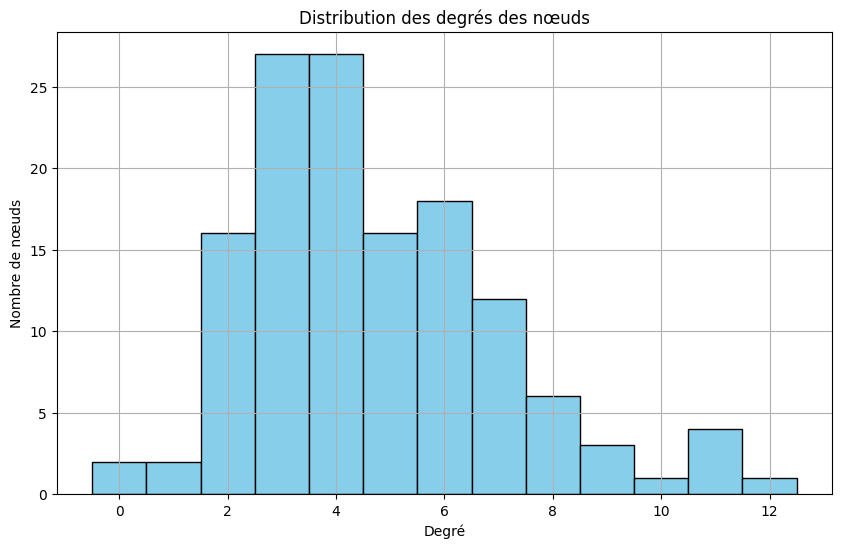

In [8]:
# Extraire les degrés de chaque nœud
degrees = [deg for node, deg in G.degree()]

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), color='skyblue', edgecolor='black', align='left')
plt.title("Distribution des degrés des nœuds")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.grid(True)
plt.show()


**G.degree()** retourne une liste de paires (nœud, degré).

On extrait uniquement les degrés pour les visualiser.

plt.hist(...) trace un histogramme :

bins=range(...) crée des barres pour chaque valeur entière de degré.

align='left' aligne les barres sur les valeurs entières.

Ce graphe montre combien de nœuds ont un degré donné.

## **Etape 8 – Visualiser le graphe avec ipycytoscape (interactif)**

Afficher le graphe de manière interactive dans Jupyter Notebook, avec zoom, déplacement, et inspection des nœuds/arêtes.

In [9]:
pip install ipycytoscape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.4 MB/s eta 0:00:00


In [10]:
from ipycytoscape import CytoscapeWidget

# Créer le widget interactif
cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)

# Afficher le graphe
cyto

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

CytoscapeWidget() crée un composant interactif dans Jupyter.

.add_graph_from_networkx(G) importe le graphe NetworkX.